In [1]:
from mlxtend.plotting import plot_decision_regions
import pandas as pd
import numpy as np
import math
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

iris = load_iris()

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df.shape

(150, 4)

In [7]:
df['target'] = iris.target

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [10]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [11]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

### Sepal Length vs Sepal Width (Setosa vs Versicolor)

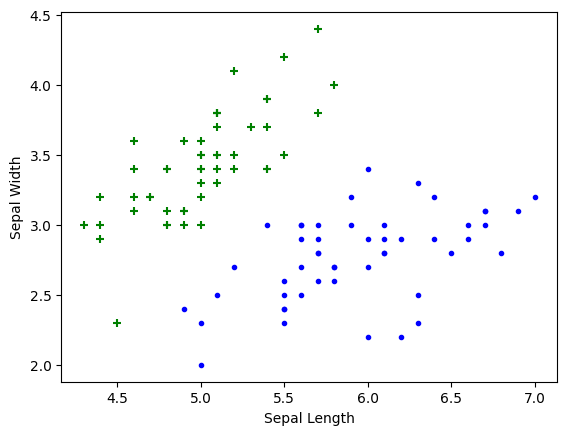

In [12]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='green', marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='blue', marker='.')

### Petal Length vs Petal Width (Setosa vs Versicolor)

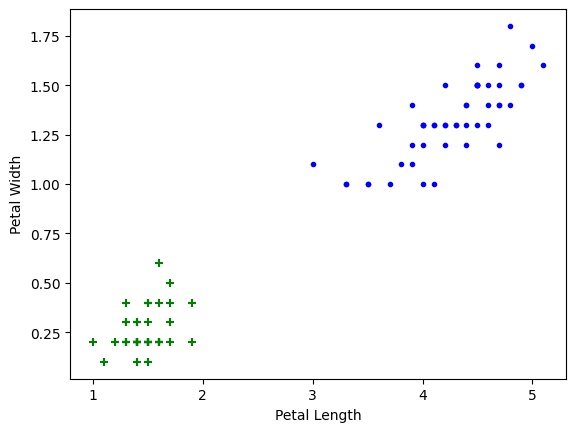

In [13]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='green', marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='blue', marker='.')

## Train test split

In [14]:
X = df.drop('target', axis='columns')
y = df.target

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [16]:
X_train.shape, X_test.shape

((120, 4), (30, 4))

In [17]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
58,6.6,2.9,4.6,1.3
97,6.2,2.9,4.3,1.3
129,7.2,3.0,5.8,1.6
114,5.8,2.8,5.1,2.4
146,6.3,2.5,5.0,1.9


In [18]:
X_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
87,6.3,2.3,4.4,1.3
111,6.4,2.7,5.3,1.9
10,5.4,3.7,1.5,0.2
91,6.1,3.0,4.6,1.4
49,5.0,3.3,1.4,0.2


In [19]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [20]:
knn.score(X_test, y_test)

0.9666666666666667

In [21]:
knn.score(X_train, y_train)

0.9666666666666667

In [22]:
n = math.ceil(np.sqrt(X_train.shape[0]))
train_scores = []
test_scores = []

for i in range(1, n):
    model = KNeighborsClassifier(i)
    model.fit(X_train, y_train)
    
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))    

In [23]:
max(train_scores), f'k={train_scores.index(max(train_scores)) + 1}'

(1.0, 'k=1')

In [24]:
max(test_scores), f'k={test_scores.index(max(test_scores)) + 1}'

(1.0, 'k=8')

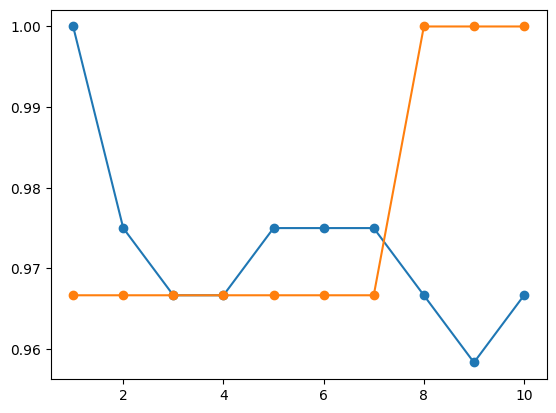

In [25]:
# plt.figure(figsize=(12,5))
plt.plot(range(1, n), train_scores, '-o')
plt.plot(range(1, n), test_scores, '-o')

## The best value of k is 8

In [26]:
knn = KNeighborsClassifier(n_neighbors=8)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [27]:
knn.score(X_test, y_test)

1.0

In [28]:
y_pred = knn.predict(X_test)

In [29]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,All
True,,,,
0,10,0,0,10
1,0,13,0,13
2,0,0,7,7
All,10,13,7,30


Text(0.5, 23.52222222222222, 'Predicted label')

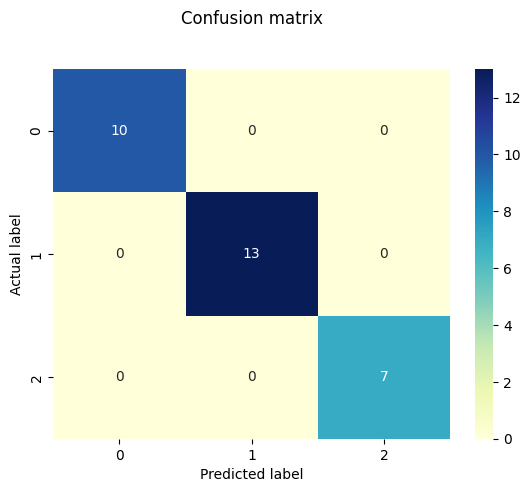

In [30]:
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

